<a href="https://colab.research.google.com/github/anastasyaNk21/Python/blob/main/%D0%9B%D0%B0%D0%B1%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
""" Початкова підготовка """

# імпортування бібліотек
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from math import tan, radians, sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# зчитування даних
df = pd.read_csv("/content/Diabets_World.csv")

# функція нормалізації
def min_max_normalization(data):
    # Знаходимо мінімальне та максимальне значення у даних
    min_val = min(data)
    max_val = max(data)

    # Виконуємо мін-макс нормалізацію для кожного значення у даних
    normalized_data = [(x - min_val) / (max_val - min_val) for x in data]

    return normalized_data

In [131]:
# Згенеруємо вхідні ознаки та відповіді у межах [0, 1]
n = 500
x = np.random.rand(n)
y = 2 * x + 1 + np.random.randn(n) * 0.2  # Лінійна регресія з шумом
y = min_max_normalization(y)
df = pd.DataFrame({'x': x, 'y': y})
x = df[['x']].values

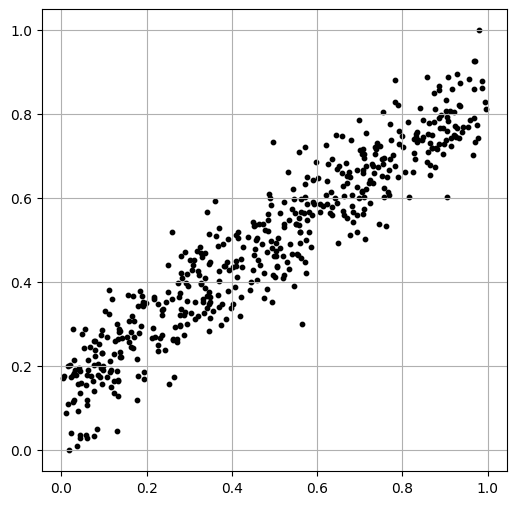

In [132]:
# поточний графік для всієї вибірки
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s = 10, color='#000')
plt.grid(True)
plt.show()

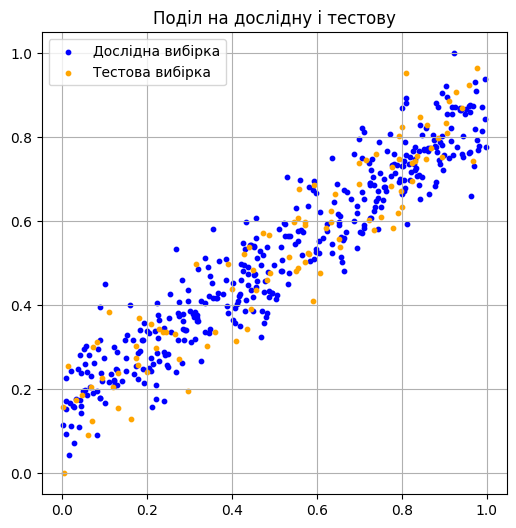

In [103]:
""" створення дослідної та тестової """
plt.figure(figsize=(6, 6))

# рандомне розділення 80/20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# графік для 2-ох вибірок
plt.scatter(X_train, y_train, s = 10, color='blue', label='Дослідна вибірка')
plt.scatter(X_test, y_test, s = 10, color='orange', label='Тестова вибірка')
plt.legend()
plt.title('Поділ на дослідну і тестову')
plt.grid(True)
plt.show()

In [134]:
def knn_regression(k, X_train, y_train, X_test, y_test):
  # навчання моделі
  model = KNeighborsRegressor(n_neighbors=k)
  model_knn = model.fit(X_train, y_train)
  y_pred = model_knn.predict(X_test)

  # обрахунок та вивід похибок
  mse = mean_squared_error(y_test, y_pred)
  r_squared = r2_score(y_test, y_pred)
  print(f"Коефіцієнт детермінації: {r_squared}")
  print(f"Середньоквадратична похибка: {mse}")

  plt.figure(figsize=(5, 5))
  # Сортування X_test для побудови впорядкованого графіку
  sorted_indices = X_test.squeeze().argsort()
  X_test_sorted = X_test[sorted_indices]
  y_pred_sorted = y_pred[sorted_indices]

  # Побудувати лінійний графік
  plt.plot(X_test_sorted, y_pred_sorted, linewidth=0.9, color='#32a88f', label='Регресія')
  plt.scatter(X_test, y_test, s = 10, color='orange', label='Тестова вибірка')
  plt.legend()
  plt.title(f"Лінія регресії при k = {k}")
  plt.grid(True)
  plt.show()

  return [mse, r_squared, k]

Коефіцієнт детермінації: 0.8416028771967168
Середньоквадратична похибка: 0.008183587952389226


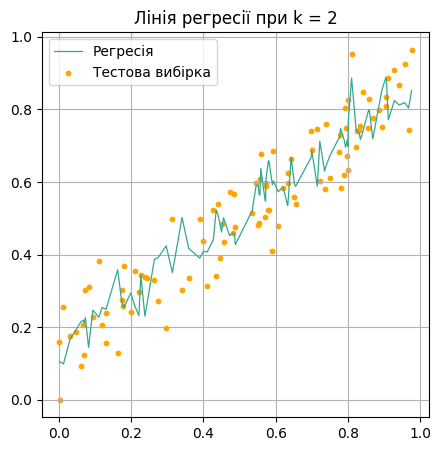

Коефіцієнт детермінації: 0.8587882383384816
Середньоквадратична похибка: 0.0072957062036035115


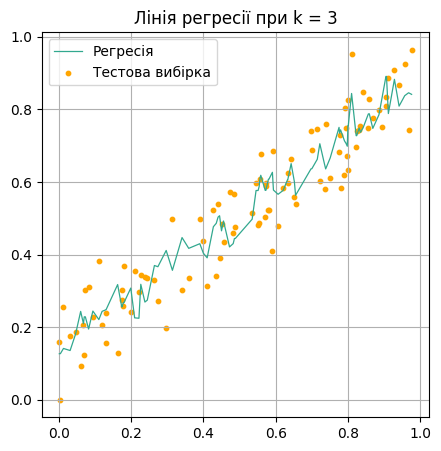

Коефіцієнт детермінації: 0.8565611192603984
Середньоквадратична похибка: 0.007410770319247667


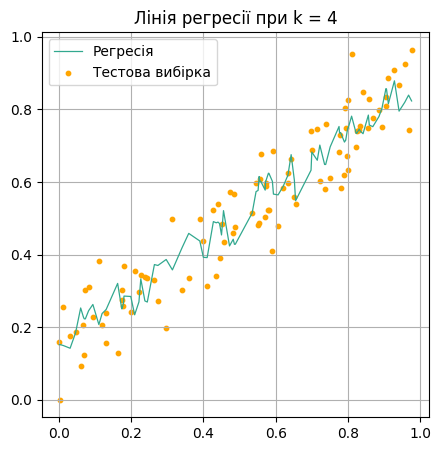

Коефіцієнт детермінації: 0.8636790974901173
Середньоквадратична похибка: 0.0070430199469227895


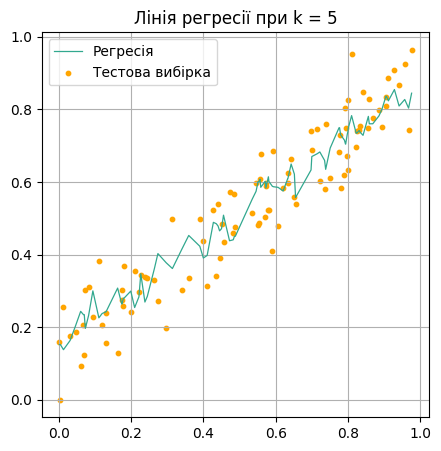

Коефіцієнт детермінації: 0.8662610506163471
Середньоквадратична похибка: 0.006909623328830876


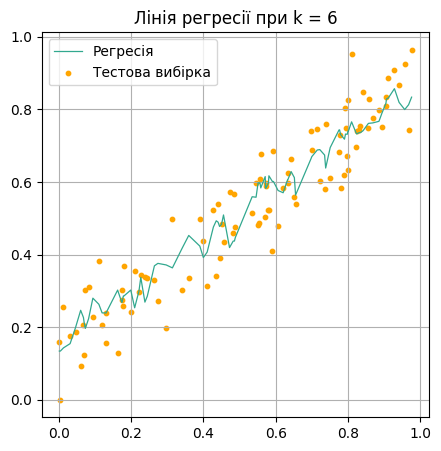

Коефіцієнт детермінації: 0.8711721394403621
Середньоквадратична похибка: 0.006655891906049694


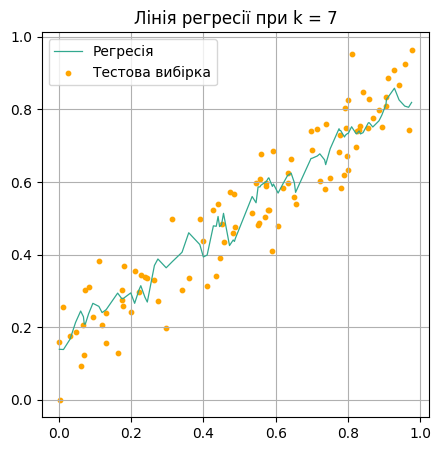

Коефіцієнт детермінації: 0.8718433816154497
Середньоквадратична похибка: 0.006621212176519473


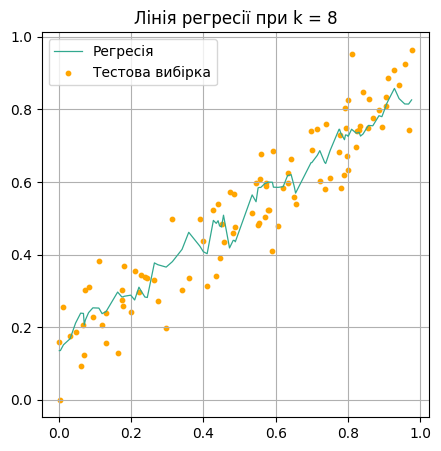

Коефіцієнт детермінації: 0.8742962574173646
Середньоквадратична похибка: 0.006494484338879472


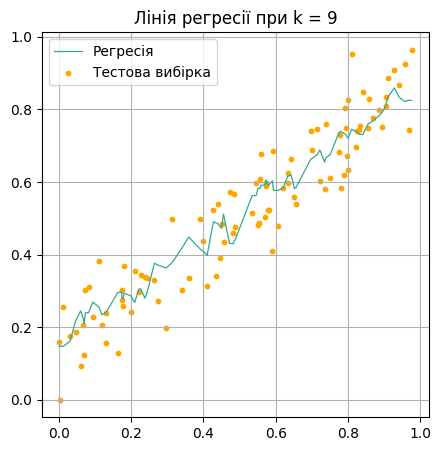

Коефіцієнт детермінації: 0.8759993003097859
Середньоквадратична похибка: 0.006406496621361839


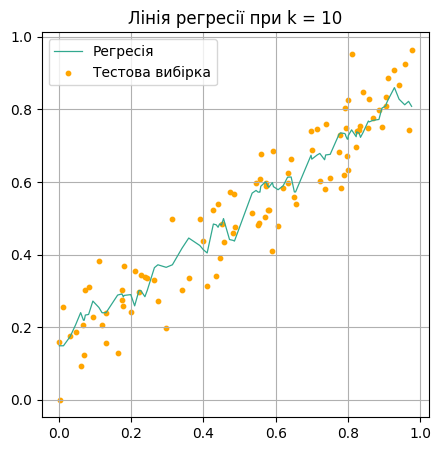

Коефіцієнт детермінації: 0.8754188432710778
Середньоквадратична похибка: 0.006436485936475544


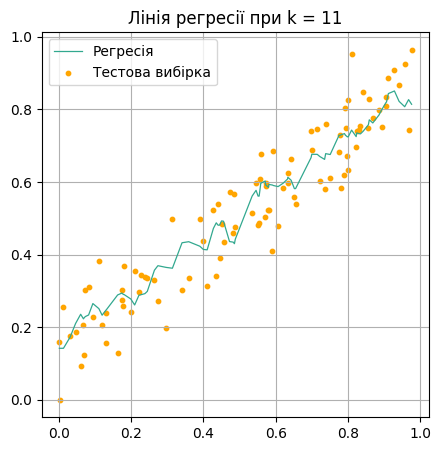

In [139]:
error_rusults = []
for k in range(2, 12):
  error_rusults.append(knn_regression(
      k=k, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
      ))


In [140]:
error_rusults_df = pd.DataFrame(error_rusults, columns=['Середн.квадр. похибка', 'Коеф. детермінації', 'К-сть сусідів'])
display(error_rusults_df)

,Середн.квадр. похибка,Коеф. детермінації,К-сть сусідів
0,0.008184,0.841603,2
1,0.007296,0.858788,3
2,0.007411,0.856561,4
3,0.007043,0.863679,5
4,0.006910,0.866261,6
5,0.006656,0.871172,7
6,0.006621,0.871843,8
7,0.006494,0.874296,9
8,0.006406,0.875999,10
9,0.006436,0.875419,11
